<a href="https://colab.research.google.com/github/Iliasecc/Projets_Finance/blob/main/Options_Calculator_with_Black_Scholes_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Options Calculator with Black Scholes model

In order to know more information about a stock option, this options calculator with Black-Scholes Model, the first widely used model for option pricing, can provide the call/put option price, d1, d2, and Greek letters. It can assist investors in establishing an option trading strategy.

#### Certain assumptions must be made due to this calculator is modeled by Black-Scholes model.
  * It works on European options that can only be exercised at expiration.
  * No dividends are paid out during the option’s life.
  * Stock markets are efficient.
  * There are no transaction and commissions costs in buying the option.
  * The risk-free rate and volatility of the underlying are known and constant.
  * The returns on the underlying are normally distributed.

#### Input variables:
  * Underlying price (per share): S;
  * Strike price of the option (per share): K;
  * Time to maturity (years): T;
  * Continuously compounding risk-free interest rate: r;
  * Volatility: sigma;

#### Output Variables:
The cumulative density function of normal distribution N(.)
- N(d2) is the risk-adjusted probability that the option will be exercised.
- N(d1) is the probability of receiving the stock at expiration of the option.

The Greek letters
- Delta: The rate of change of the option price respected to the rate of the change of underlying asset price.
- Gamma: The rate of change of delta respected to the rate of change of underlying asset price.
- Vega: The rate of change of the option price respected to the volatility of the underlying asset.
- Rho: The rate of the option price respected to the interest rate.
- Theta: The rate of change of the option price respected to the passage of time.

In [1]:
## import certain packages
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd
from pandas import DataFrame

In [2]:
# Underlying price (per share): S;
# Strike price of the option (per share): K;
# Time to maturity (years): T;
# Continuously compounding risk-free interest rate: r;
# Volatility: sigma;

## define two functions, d1 and d2 in Black-Scholes model
def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/sigma*sqrt(T)
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

In [3]:
## define the call options price function
def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))

In [4]:
## define the put options price function
def bs_put(S,K,T,r,sigma):
    return K*exp(-r*T)-S+bs_call(S,K,T,r,sigma)

In [5]:
## define the Call_Greeks of an option
def call_delta(S,K,T,r,sigma):
    return norm.cdf(d1(S,K,T,r,sigma))
def call_gamma(S,K,T,r,sigma):
    return norm.pdf(d1(S,K,T,r,sigma))/(S*sigma*sqrt(T))
def call_vega(S,K,T,r,sigma):
    return 0.01*(S*norm.pdf(d1(S,K,T,r,sigma))*sqrt(T))
def call_theta(S,K,T,r,sigma):
    return 0.01*(-(S*norm.pdf(d1(S,K,T,r,sigma))*sigma)/(2*sqrt(T)) - r*K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma)))
def call_rho(S,K,T,r,sigma):
    return 0.01*(K*T*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma)))

In [6]:
## define the Put_Greeks of an option
def put_delta(S,K,T,r,sigma):
    return -norm.cdf(-d1(S,K,T,r,sigma))
def put_gamma(S,K,T,r,sigma):
    return norm.pdf(d1(S,K,T,r,sigma))/(S*sigma*sqrt(T))
def put_vega(S,K,T,r,sigma):
    return 0.01*(S*norm.pdf(d1(S,K,T,r,sigma))*sqrt(T))
def put_theta(S,K,T,r,sigma):
    return 0.01*(-(S*norm.pdf(d1(S,K,T,r,sigma))*sigma)/(2*sqrt(T)) + r*K*exp(-r*T)*norm.cdf(-d2(S,K,T,r,sigma)))
def put_rho(S,K,T,r,sigma):
    return 0.01*(-K*T*exp(-r*T)*norm.cdf(-d2(S,K,T,r,sigma)))

###### Input

In [51]:
## input the current stock price and check if it is a number.
S = input("What is the current stock price? ");
while True:
    try:
        S = float(S)
        break
    except:
        print("The current stock price has to be a NUMBER.")
        S = input("What is the current stock price? ")

## input the strike price and check if it is a number.
K = input("What is the strike price? ");
while True:
    try:
        K = float(K)
        break
    except:
        print("The the strike price has to be a NUMBER.")
        K = input("What is the strike price? ")


## input the expiration_date and calculate the days between today and the expiration date.
while True:
    expiration_date = input("What is the expiration date of the options? (mm-dd-yyyy) ")
    try:
        expiration_date = datetime.strptime(expiration_date, "%m-%d-%Y")
    except ValueError as e:
        print("error: %s\nTry again." % (e,))
    else:
        break
T = (expiration_date - datetime.utcnow()).days / 365


## input the continuously compounding risk-free interest rate and check if it is a number.
r = input("What is the continuously compounding risk-free interest rate in percentage(%)? ");
while True:
    try:
        r = float(r)
        break
    except:
        print("The continuously compounding risk-free interest rate has to be a NUMBER.")
        r = input("What is the continuously compounding risk-free interest rate in percentage(%)? ")


## input the volatility and check if it is a number.
sigma = input("What is the volatility in percentage(%)? ");
while True:
    try:
        sigma = float(sigma)
        if sigma > 100 or sigma < 0:
            print ( "The range of sigma has to be in [0,100].")
            sigma = input("What is the volatility in percentage(%)? ")
        break
    except:
        print("The volatility has to be a NUMBER.")
        sigma = input("What is the volatility in percentage(%)? ")

What is the current stock price? 222.77999877929688
What is the strike price? 222.77999877929688
What is the expiration date of the options? (mm-dd-yyyy) 07-25-2025
What is the continuously compounding risk-free interest rate in percentage(%)? 4
What is the volatility in percentage(%)? 10.52


In [52]:
## make a DataFrame of these inputs

data = {'Symbol': ['S', 'K', 'T', 'r', 'sigma'],
        'Input': [S, K, T , r , sigma]}
input_frame = DataFrame(data, columns=['Symbol', 'Input'],
                   index=['Underlying price', 'Strike price', 'Time to maturity', 'Risk-free interest rate', 'Volatility'])
input_frame

,Symbol,Input
Underlying price,S,222.779999
Strike price,K,222.779999
Time to maturity,T,0.493151
Risk-free interest rate,r,4.000000
Volatility,sigma,10.520000


###### Output

In [53]:
## calculate the call / put option price and the greeks of the call / put option
r = r/100; sigma = sigma/100;
price_and_greeks = {'Call' : [bs_call(S,K,T,r,sigma), call_delta(S,K,T,r,sigma), call_gamma(S,K,T,r,sigma),call_vega(S,K,T,r,sigma), call_rho(S,K,T,r,sigma), call_theta(S,K,T,r,sigma)],
                    'Put' : [bs_put(S,K,T,r,sigma), put_delta(S,K,T,r,sigma), put_gamma(S,K,T,r,sigma),put_vega(S,K,T,r,sigma), put_rho(S,K,T,r,sigma), put_theta(S,K,T,r,sigma)]}
price_and_greeks_frame = DataFrame(price_and_greeks, columns=['Call','Put'], index=['Price', 'delta', 'gamma','vega','rho','theta'])
price_and_greeks_frame

,Call,Put
Price,8.830237,4.478733
delta,0.559576,-0.440424
gamma,0.023969,0.023969
vega,0.617159,0.617159
rho,0.571227,-0.505955
theta,-0.112160,-0.024788


####Payoff


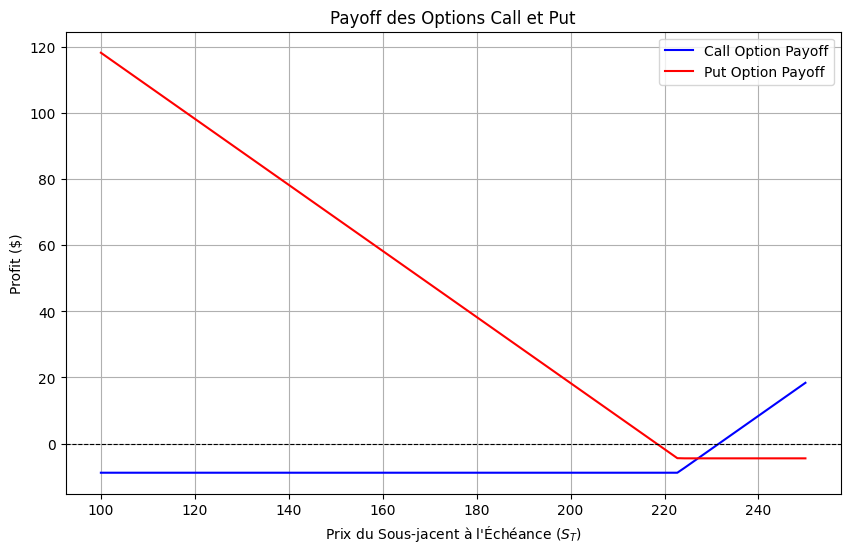

In [54]:
import numpy as np
import matplotlib.pyplot as plt


premium_call = price_and_greeks_frame.loc['Price', 'Call']  # Prix de l'option Call
premium_put = price_and_greeks_frame.loc['Price', 'Put']  # Prix de l'option Put

# Générer une gamme de prix pour le sous-jacent à l'échéance
S_T = np.linspace(100, 250, 100)

# Calculer les payoffs
payoff_call = np.maximum(S_T - K, 0) - premium_call
payoff_put = np.maximum(K - S_T, 0) - premium_put

# Tracer les payoffs
plt.figure(figsize=(10, 6))
plt.plot(S_T, payoff_call, label='Call Option Payoff', color='blue')
plt.plot(S_T, payoff_put, label='Put Option Payoff', color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Payoff des Options Call et Put')
plt.xlabel('Prix du Sous-jacent à l\'Échéance ($S_T$)')
plt.ylabel('Profit ($)')
plt.legend()
plt.grid(True)
plt.show()


####Application réel

In [32]:
!pip install yfinance

[*********************100%***********************]  1 of 1 completed


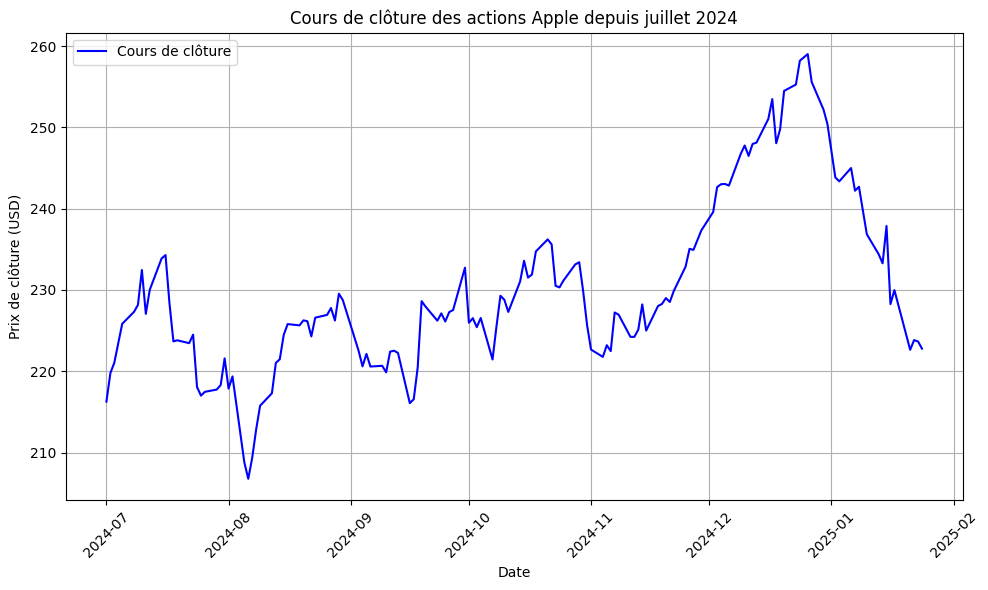

In [36]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Définir le symbole boursier et la période
symbol = "AAPL"
start_date = "2024-07-01"
end_date = datetime.today().strftime('%Y-%m-%d')

# 2. Télécharger les données de Yahoo Finance
data1 = yf.download(symbol, start=start_date, end=end_date)

# Enregistrer les données en local sous forme de fichier CSV
data1.to_csv("aapl_stock_data.csv")

# 3. Extraire les cours de clôture
close_prices = data1['Close']

# 4. Tracer un graphique simple avec Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(close_prices.index, close_prices, label='Cours de clôture', color='blue')
plt.title(f"Cours de clôture des actions Apple depuis juillet 2024")
plt.xlabel("Date")
plt.ylabel("Prix de clôture (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [37]:
data = data[['Close']]

# Enregistrer le dataset filtré en local
data.to_csv("aapl_close_data.csv")

# 4. Effectuer une étude statistique sur les prix de clôture avec describe()
print("Statistiques descriptives sur les prix de clôture :")
print(data['Close'].describe())

Statistiques descriptives sur les prix de clôture :
Ticker        AAPL
count   143.000000
mean    229.763192
std      10.524920
min     206.762924
25%     222.722511
50%     227.299927
75%     234.081223
max     259.019989


In [39]:
!pip install plotly.graph_objects


ERROR: Could not find a version that satisfies the requirement plotly.graph_objects (from versions: none)
ERROR: No matching distribution found for plotly.graph_objects


In [47]:
import pandas as pd
import plotly.graph_objects as go

# Charger les données depuis le fichier CSV
file_path = '/content/Data_aapl.csv'  # Remplace par le chemin réel vers ton fichier
data = pd.read_csv(file_path)

# S'assurer que la colonne 'Date' est bien en format datetime
data['Date'] = pd.to_datetime(data['Date'])

# Définir la colonne 'Date' comme index
data.set_index('Date', inplace=True)

# Créer une courbe pour le prix de clôture
fig = go.Figure()

# Ajouter la courbe des prix de clôture
fig.add_trace(go.Scatter(x=data.index, y=data['Close'],
                         mode='lines',
                         name='Close',
                         line=dict(color='blue', width=2)))

# Ajouter un titre et des labels
fig.update_layout(title='Suivi des prix Apple - Courbe de Clôture',
                  xaxis_title='Date',
                  yaxis_title='Prix de Clôture',
                  template='plotly_dark')

# Afficher le graphique interactif
fig.show()


Shapiro-Wilk test statistic: 0.935521190133412
Shapiro-Wilk p-value: 4.00881732506779e-06
Les données ne suivent pas une loi normale.


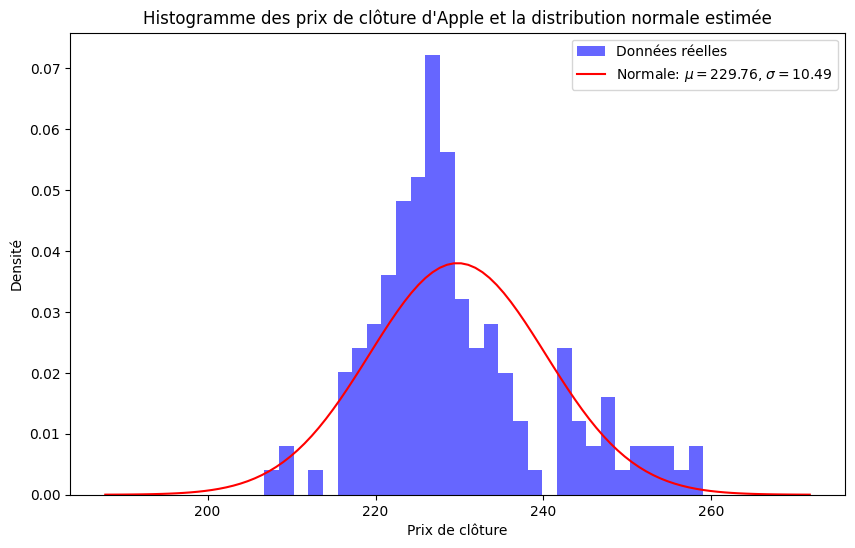

In [48]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Charger les données depuis le fichier CSV
file_path = '/content/Data_aapl.csv'  # Remplace par le chemin réel vers ton fichier
data = pd.read_csv(file_path)

# Assurer que la colonne 'Date' est bien en format datetime
data['Date'] = pd.to_datetime(data['Date'])

# Définir la colonne 'Date' comme index
data.set_index('Date', inplace=True)

# Extraire les données de 'Close'
close_prices = data['Close']

# 1. Test de normalité de Shapiro-Wilk
stat, p_value = stats.shapiro(close_prices)

print(f"Shapiro-Wilk test statistic: {stat}")
print(f"Shapiro-Wilk p-value: {p_value}")

# Si p-value est supérieur à 0.05, on peut supposer que les données suivent une loi normale
if p_value > 0.05:
    print("Les données suivent une loi normale.")
else:
    print("Les données ne suivent pas une loi normale.")

# 2. Calcul de la moyenne et de l'écart-type des prix de clôture
mean_close = np.mean(close_prices)
std_close = np.std(close_prices)

# 3. Tracer la courbe de distribution normale et les données réelles
x = np.linspace(mean_close - 4*std_close, mean_close + 4*std_close, 100)
y = stats.norm.pdf(x, mean_close, std_close)

# Tracer l'histogramme des données réelles de 'Close'
plt.figure(figsize=(10, 6))
plt.hist(close_prices, bins=30, density=True, alpha=0.6, color='b', label='Données réelles')

# Tracer la courbe de distribution normale
plt.plot(x, y, 'r-', label=f"Normale: $\mu={mean_close:.2f}$, $\sigma={std_close:.2f}$")

# Ajouter un titre et des labels
plt.title("Histogramme des prix de clôture d'Apple et la distribution normale estimée")
plt.xlabel("Prix de clôture")
plt.ylabel("Densité")
plt.legend()

# Afficher le graphique
plt.show()


In [50]:
# Afficher le prix de clôture d'aujourd'hui
today_price = data['Close'].iloc[-1]  # Supposons que la première ligne est la plus récente
print(f"Le prix de clôture d'Apple aujourd'hui est : {today_price}")


Le prix de clôture d'Apple aujourd'hui est : 222.77999877929688


  Méthode de monte carlo

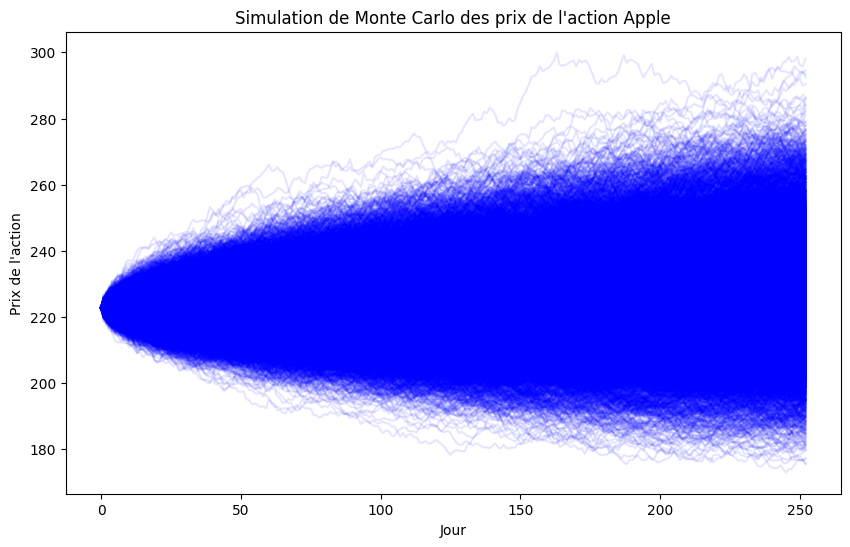

Prix de l'option Call (Monte Carlo) : 8.833600487244453
Prix de l'option Put (Monte Carlo) : 4.605413140816671


In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
S = 222.779999  # Prix de l'action actuel
K = 222.779999  # Prix d'exercice
T = 0.493151  # Temps jusqu'à maturité en années
r = 0.04  # Taux d'intérêt sans risque (4%)
sigma = 0.1052  # Volatilité (10.52%)

# Nombre de simulations
num_simulations = 10000
num_steps = 252  # Nombre de jours de trading par an (ici pour daily steps)

# Calcul des pas de temps
dt = T / num_steps

# Simulations de Monte Carlo
np.random.seed(42)  # Pour garantir la reproductibilité
simulated_prices = np.zeros((num_simulations, num_steps + 1))
simulated_prices[:, 0] = S  # Le prix initial de l'action

# Génération des trajectoires
for i in range(1, num_steps + 1):
    z = np.random.normal(0, 1, num_simulations)  # Variable aléatoire normale
    simulated_prices[:, i] = simulated_prices[:, i - 1] * np.exp(
        (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z
    )

# Visualisation des trajectoires simulées
plt.figure(figsize=(10, 6))
plt.plot(simulated_prices.T, color='blue', alpha=0.1)  # Trajectoires simulées
plt.title('Simulation de Monte Carlo des prix de l\'action Apple')
plt.xlabel('Jour')
plt.ylabel('Prix de l\'action')
plt.show()

# Calcul du prix de l'option call pour chaque scénario simulé
payoffs_call = np.maximum(simulated_prices[:, -1] - K, 0)
price_call_mc = np.exp(-r * T) * np.mean(payoffs_call)

# Calcul du prix de l'option put pour chaque scénario simulé
payoffs_put = np.maximum(K - simulated_prices[:, -1], 0)
price_put_mc = np.exp(-r * T) * np.mean(payoffs_put)

print(f"Prix de l'option Call (Monte Carlo) : {price_call_mc}")
print(f"Prix de l'option Put (Monte Carlo) : {price_put_mc}")


Méthode de Heston

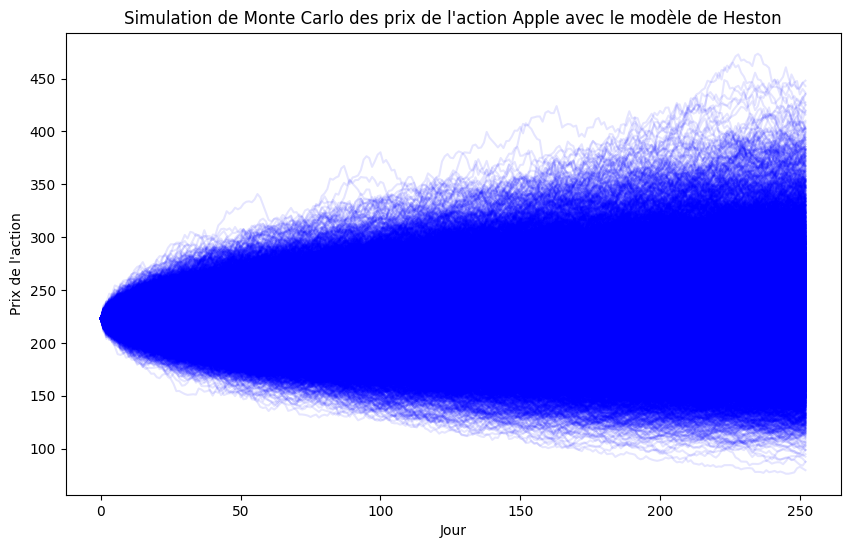

Prix de l'option Call (Heston - Monte Carlo) : 22.11318231018082
Prix de l'option Put (Heston - Monte Carlo) : 17.59535024015291


In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du modèle de Heston
S = 222.779999  # Prix de l'action actuel
K = 222.779999  # Prix d'exercice
T = 0.493151  # Temps jusqu'à maturité en années
r = 0.04  # Taux d'intérêt sans risque (4%)
v0 = 0.1052  # Volatilité initiale (variance initiale)
kappa = 2.0  # Vitesse de réversion à la moyenne
theta = 0.10  # Niveau de long terme de la volatilité
sigma_v = 0.2  # Volatilité de la volatilité
rho = -0.5  # Corrélation entre les deux processus (prix et volatilité)

# Nombre de simulations
num_simulations = 10000
num_steps = 252  # Nombre de jours de trading par an (ici pour daily steps)

# Calcul des pas de temps
dt = T / num_steps

# Simulations de Monte Carlo pour le modèle de Heston
np.random.seed(42)  # Pour garantir la reproductibilité
simulated_prices = np.zeros((num_simulations, num_steps + 1))
simulated_vols = np.zeros((num_simulations, num_steps + 1))
simulated_prices[:, 0] = S  # Le prix initial de l'action
simulated_vols[:, 0] = v0  # La volatilité initiale

# Génération des trajectoires pour les prix et les volatilités
for i in range(1, num_steps + 1):
    z1 = np.random.normal(0, 1, num_simulations)  # Normal pour le prix
    z2 = np.random.normal(0, 1, num_simulations)  # Normal pour la volatilité
    dz2 = rho * z1 + np.sqrt(1 - rho**2) * z2  # Corrélation entre les deux bruits

    # Mise à jour de la volatilité en utilisant l'équation stochastique
    simulated_vols[:, i] = simulated_vols[:, i - 1] + kappa * (theta - simulated_vols[:, i - 1]) * dt + sigma_v * np.sqrt(simulated_vols[:, i - 1]) * np.sqrt(dt) * dz2

    # Mise à jour du prix de l'action en utilisant l'équation stochastique
    simulated_prices[:, i] = simulated_prices[:, i - 1] * np.exp((r - 0.5 * simulated_vols[:, i - 1]) * dt + np.sqrt(simulated_vols[:, i - 1]) * np.sqrt(dt) * z1)

# Visualisation des trajectoires simulées
plt.figure(figsize=(10, 6))
plt.plot(simulated_prices.T, color='blue', alpha=0.1)  # Trajectoires simulées
plt.title('Simulation de Monte Carlo des prix de l\'action Apple avec le modèle de Heston')
plt.xlabel('Jour')
plt.ylabel('Prix de l\'action')
plt.show()

# Calcul du prix de l'option call pour chaque scénario simulé
payoffs_call = np.maximum(simulated_prices[:, -1] - K, 0)
price_call_mc_heston = np.exp(-r * T) * np.mean(payoffs_call)

# Calcul du prix de l'option put pour chaque scénario simulé
payoffs_put = np.maximum(K - simulated_prices[:, -1], 0)
price_put_mc_heston = np.exp(-r * T) * np.mean(payoffs_put)

print(f"Prix de l'option Call (Heston - Monte Carlo) : {price_call_mc_heston}")
print(f"Prix de l'option Put (Heston - Monte Carlo) : {price_put_mc_heston}")


#### Implied volatility

Implied volatility (IV) is “implying” the volatility of the stock will be in the future, based on price changes in an option.

In [ ]:
## input a put or call option price

option = input ("Put or Call option? (P/C)  ")
while option != 'P' and option !='C' :
    print ("error: this option does not match the format (P/C) \nTry again.")
    option = input ("Put or Call option? (P/C)  ")

Price = input("What is the option price? ");
while True:
    try:
        Price = float(Price)
        break
    except:
        print("The the option price has to be a NUMBER.")
        Price = input("What is the option price? ")

Put or Call option? (P/C)  P
What is the option price? 8


In [ ]:
## to calculate the volatility of a put/call option

def implied_volatility(Price,S,K,T,r):
    sigma = 0.001
    print (np.array([['Price', 'S', 'K', 'T', 'r'], [Price, S, K, T, r]]))
    if option == 'C':
        while sigma < 1:
            Price_implied = S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
            if Price-(Price_implied) < 0.001:
                return sigma
            sigma += 0.001
        return "It could not find the right volatility of the call option."
    else:
        while sigma < 1:
            Price_implied = K*exp(-r*T)-S+bs_call(S,K,T,r,sigma)
            if Price-(Price_implied) < 0.001:
                return sigma
            sigma += 0.001
        return "It could not find the right volatility of the put option."
    return

print ("The implied volatility is " + str (100* implied_volatility(Price,S,K,T,r)) + " %.")

[['Price' 'S' 'K' 'T' 'r']
 ['8.0' '100.0' '100.0' '0.12876712328767123' '0.2']]
The implied volatility is 66.70000000000005 %.
